In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generation of Poisson spike trains

In [2]:
n = 1000       # number of neurons
t = 2          # total duration [s]
dt = 1e-4      # step size [s]
n_bins = int(2/dt)  # number of time bins
rx = 10      # firing rate of each neuron

# generates random Poisson spike trains (they are only "Poisson" in the limit of small step size)
spikes = np.random.binomial(1, rx*dt, size=(n,n_bins))

Empirically estimated firing rate for each neuron: 

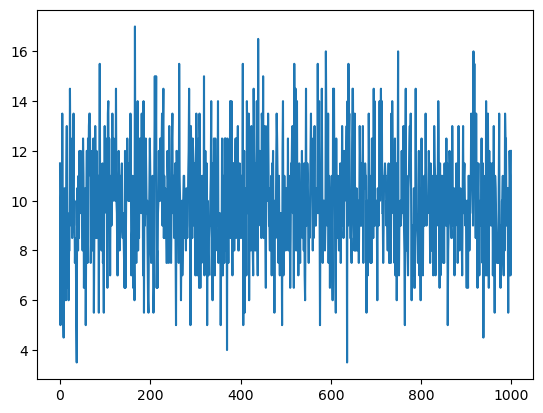

In [3]:
plt.plot(np.sum(spikes,axis=1)/(dt*n_bins))

# Single LIF neuron with single excitatory Poisson input train

In [4]:
# parameters of the neurons
tau = 20e-3   # membrane time constant [s]
v_thresh = 1  # without loss of generality -- this in fact sets the scale of the synaptic weights

In [5]:
def LIF_integrate(h, tau=20e-3, v_thresh=1):
    n_bins = np.size(h)
    v = np.zeros(n_bins)     # to store the voltage
    s_out = np.zeros(n_bins) # to store the APs
    has_just_spiked = False

    for k in range(1, n_bins):
        if has_just_spiked:
            v[k] = 0 # reset potential; set to 0 w.l.o.g.
            has_just_spiked = False
        else:
            v[k] = v[k-1]*(1-dt/tau) + h[k]
        # check if we need to generate an output spike
        if v[k] > v_thresh: # threshold set to 1 w.l.o.g. (this sets the scale of the synaptic weights)
            v[k] = 5 # just for visualisation purposes...
            has_just_spiked = True
            s_out[k] = 1
    return v, s_out

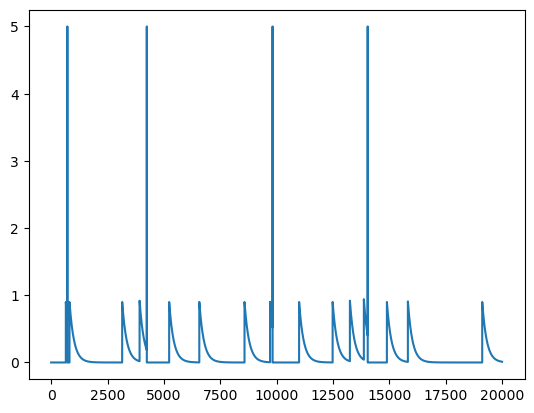

In [6]:
# generate input spikes
s_in = np.random.binomial(1, rx*dt, size=n_bins)
w = 0.9
# input to the neuron is the input spike train scaled by w
h = w * s_in
v, _ = LIF_integrate(h)
plt.plot(v)

# Single LIF neuron, many excitatory inputs

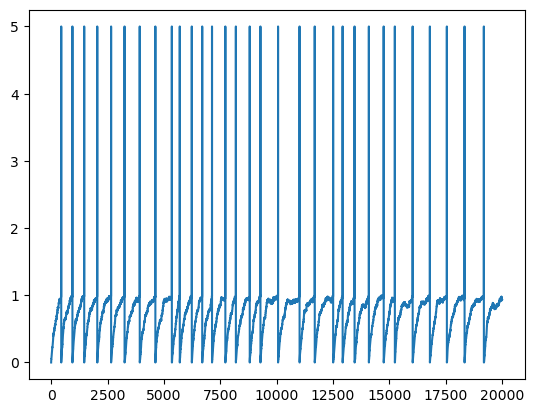

In [7]:
K = 1000      # number of input synapses
w = 5.1 / K   # synaptic weight; note the 1/K scaling required to have a finite mean input → finite output rate

# generate input spikes
s_in = np.random.binomial(1, rx*dt, size=(K,n_bins))

# given that all input synapses have the same weight here,
# we might as well sum them up ahead of integrating the ODE
s_in_total = np.sum(s_in, axis=0) 
h = w * s_in_total
v, _ = LIF_integrate(h)
plt.plot(v) # note the very regular spiking

# Single LIF neuron, balanced excitatory and inhibitory inputs

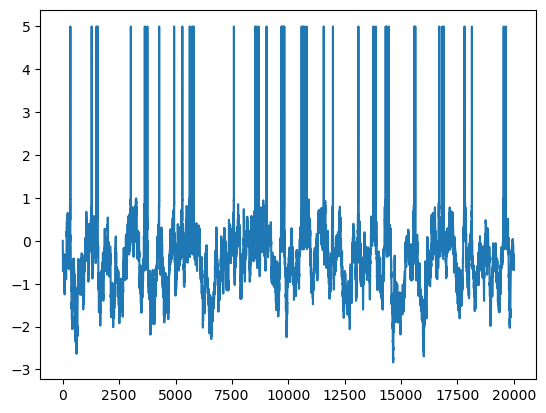

In [8]:
K = 1000      # number of input synapses
wE = 2. / np.sqrt(K)   # synaptic weight; note the 1/sqrt(K) scaling required to have a finite variance
wI = -wE
# generate input spikes
sE_in = np.random.binomial(1, rx*dt, size=(K,n_bins))
sI_in = np.random.binomial(1, rx*dt, size=(K,n_bins))

# given that all input synapses have the same weight here,
# we might as well sum them up ahead of integrating the ODE
h = wE * np.sum(sE_in, axis=0) + wI * np.sum(sI_in, axis=0)
v, _ = LIF_integrate(h)
plt.plot(v) # note the very variable spiking now